In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

In [2]:
df_US = df[df['job_country'] == 'United States']

In [3]:
df_skills=df_US.explode('job_skills')

In [4]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='job_skill')
df_skills_count = df_skills_count.sort_values(by='job_skill', ascending=False)
df_skills_count

,job_skills,job_title_short,job_skill
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [5]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = job_titles[:3] ##first three job titles
job_titles = sorted(job_titles) ##sort job titles alphabetically
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [6]:
##To find the % of each skill in each job title

df_job_tilte_count= df_us = df_US['job_title_short'].value_counts().reset_index(name='total_jobs')
df_us

,job_title_short,total_jobs
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [7]:
df_skills_perc= pd.merge(df_skills_count, df_job_tilte_count, on='job_title_short', how='left')
df_skills_perc['skill_perc']= (df_skills_perc['job_skill']/df_skills_perc['total_jobs'])*100
df_skills_perc

,job_skills,job_title_short,job_skill,total_jobs,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


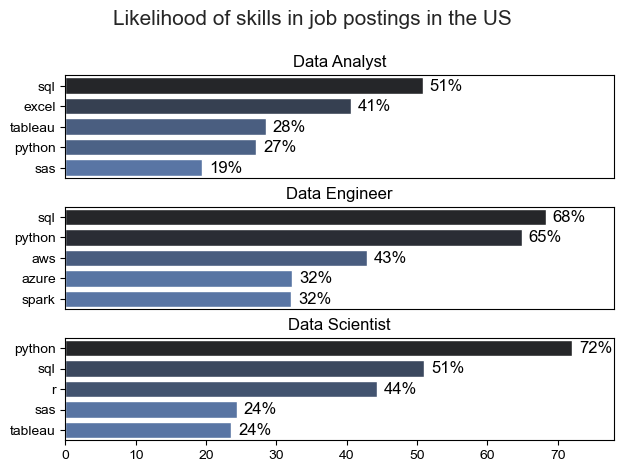

In [8]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.set_theme(style="ticks")
    ##df_plot.plot(kind='barh', x='job_skills', y='skill_perc', ax=ax[i], legend=False) 
    sns.barplot(data=df_plot, y='job_skills', x='skill_perc', ax=ax[i], palette='dark:b_r', hue='job_skill', dodge=False, legend=False)
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 78)


    for n, v in enumerate(df_plot['skill_perc']):
        ax[i].text(v + 1, n, f"{v:.0f}%", color='black', va='center')

        if i != len(job_titles) - 1:
            ax[i].set_xticks([])

    fig.suptitle('Likelihood of skills in job postings in the US', fontsize=15)
    fig.tight_layout(h_pad=0.5)

plt.show()